In [146]:
import photutils, astropy
from photutils import datasets
from astropy.modeling.functional_models import Sersic2D

import numpy as np
import matplotlib.pyplot as plt

from astropy import visualization, convolution, stats

from collections import OrderedDict

import time

import ashd

from astropy.io import fits
from astropy import units as u
from astropy.coordinates import SkyCoord

import subprocess

import skimage
from skimage import morphology, restoration

import sep

%matplotlib inline
plt.rcParams['figure.figsize'] = [18, 18]

In [135]:
def ds9me(val): subprocess.Popen(["ds9", val])

norm = visualization.mpl_normalize.ImageNormalize(
    stretch=visualization.SqrtStretch())

In [3]:
butler = ashd.Butler(data_dir="/run/media/me/DATA/asas-sn-images")

In [4]:
coord = SkyCoord("02h39m59.3s −34d26m57s")
imgn = butler.get_image_fn(ra=coord.ra.deg,dec=coord.dec.deg)
ds9me(imgn)

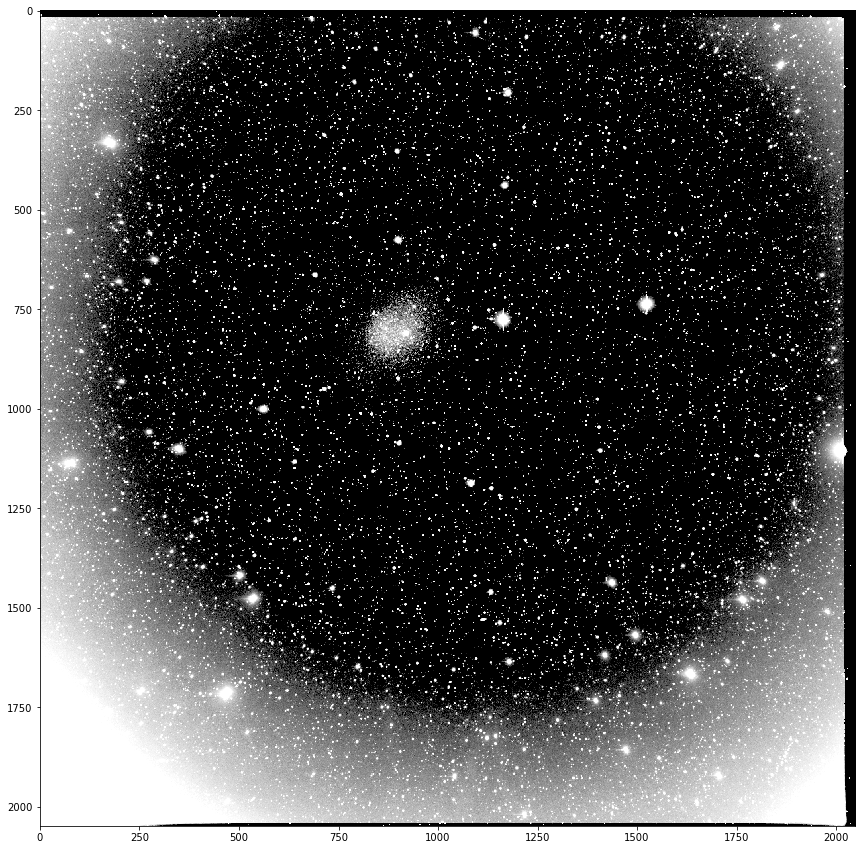

In [109]:
img = fits.open(imgn)
data = img[0].data
vmin, vmax = np.percentile(data, [60, 95])
#data[~(data > vmin)] = 0
plt.imshow(data, cmap="Greys_r", norm=norm, vmin=vmin, vmax=vmax)

In [91]:
NBINS = 1000
print(f'Max: {np.max(data)}')

Max: 533175.0


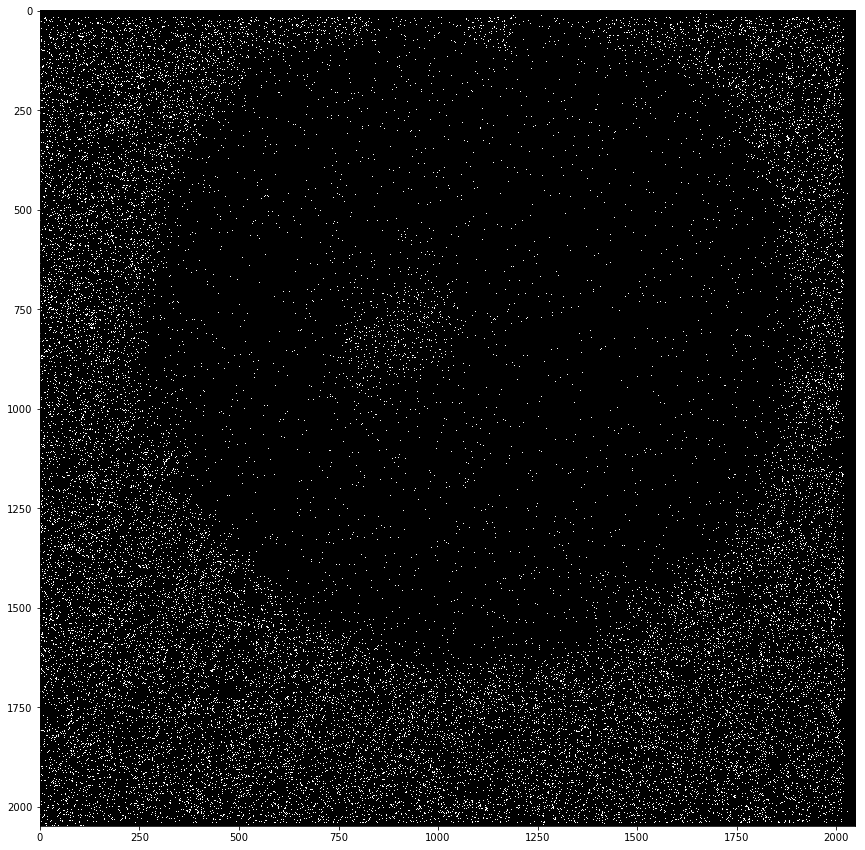

In [90]:
limg = np.arcsinh(data)
limg[~(limg > 6.9)] = 0
lm = morphology.local_maxima(limg)
plt.imshow(lm, cmap="Greys_r")

In [92]:
yeet = np.sort(data.flatten())
np.amax(yeet)
np.percentile(yeet, [10,99])


array([478.48355103, 959.22449097])

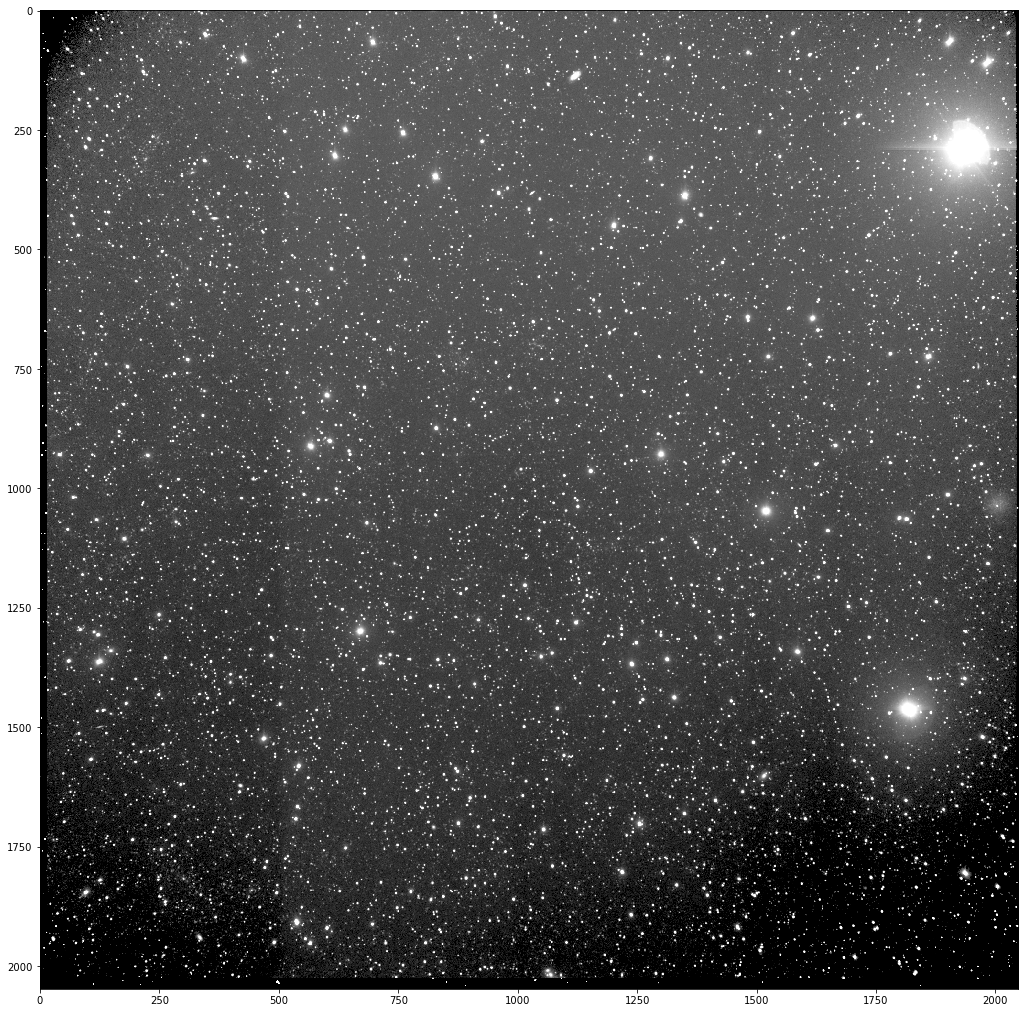

In [140]:
imgn2 = butler.get_image_fn(ra=168.37, dec=22.151)
img2 = fits.open(imgn2)
data2 = img2[0].data
vmin, vmax = np.percentile(data2, [10, 99])
plt.imshow(data2, cmap="Greys_r", norm=norm, vmin=vmin, vmax=vmax)

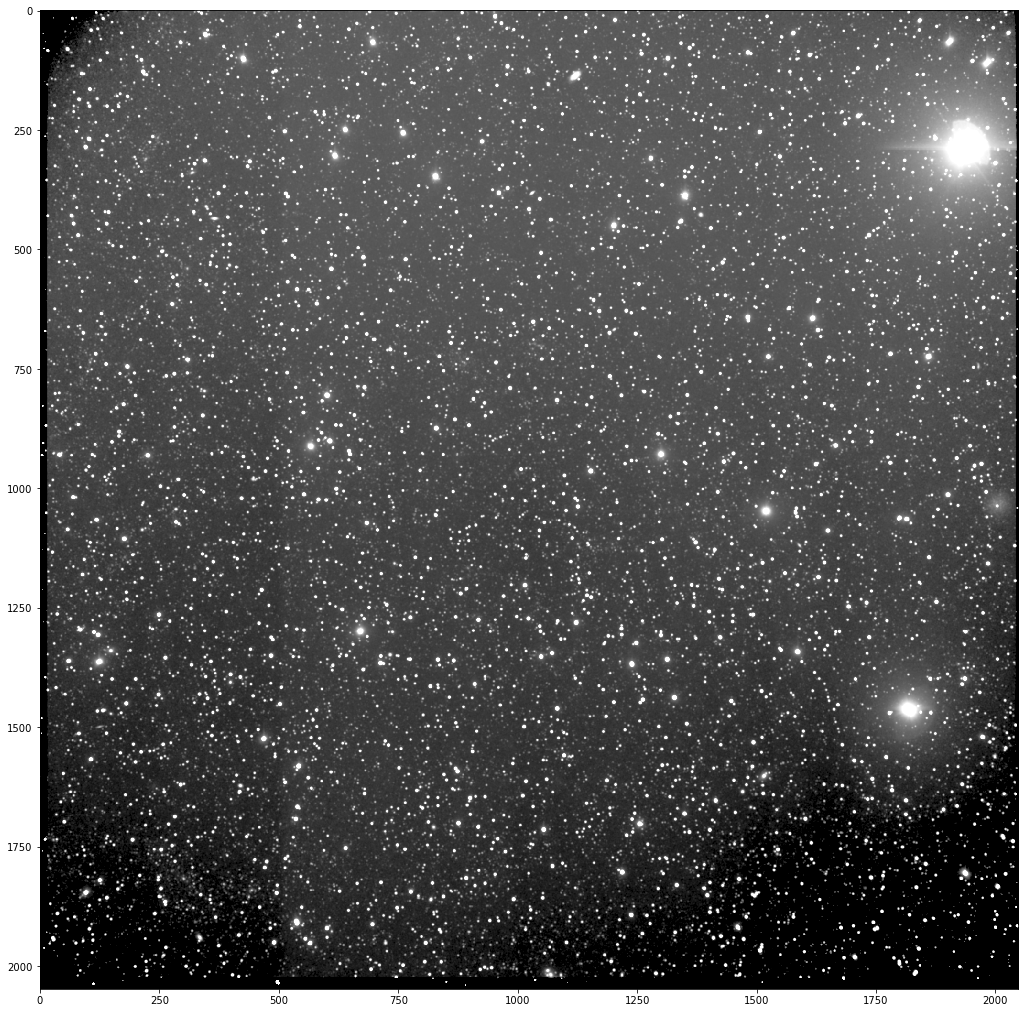

In [141]:
plt.imshow(skimage.filters.gaussian(data2, 1), cmap="Greys_r", norm=norm, vmin=vmin, vmax=vmax)

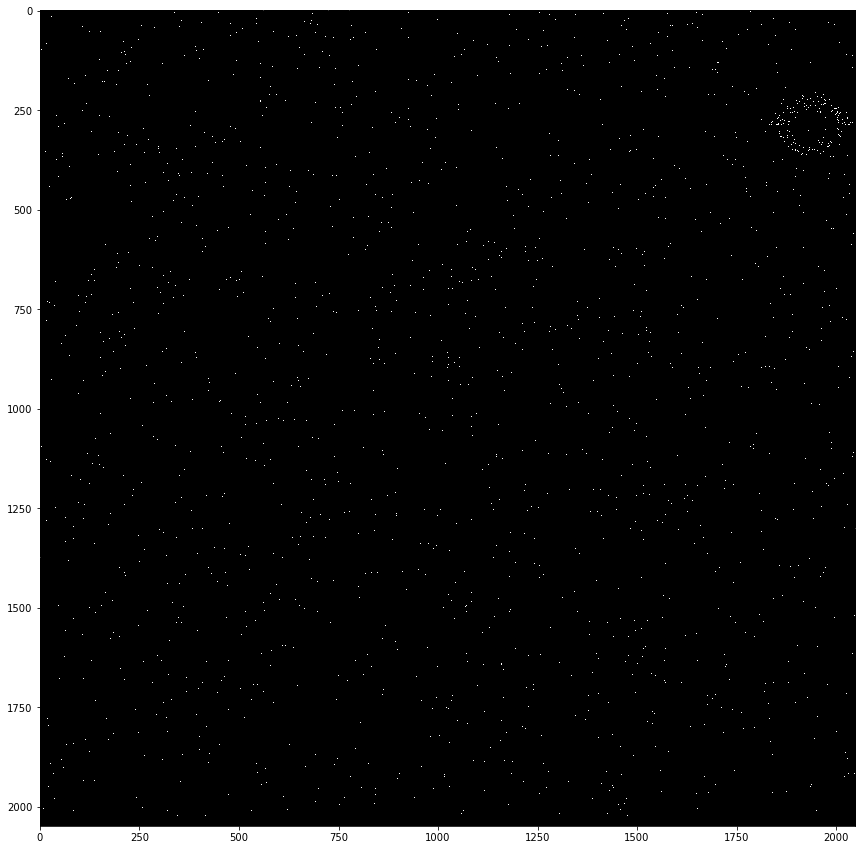

In [118]:
limg = np.arcsinh(data2)
limg[~(limg > 6.7)] = 0
lm = morphology.local_maxima(limg)
plt.imshow(lm, cmap="Greys_r")

In [127]:
psf = np.ones((5, 5)) / 25
restored = restoration.richardson_lucy(data2, psf, iterations=30)

In [144]:
data3 = data.byteswap().newbyteorder()
background = sep.Background(data3)

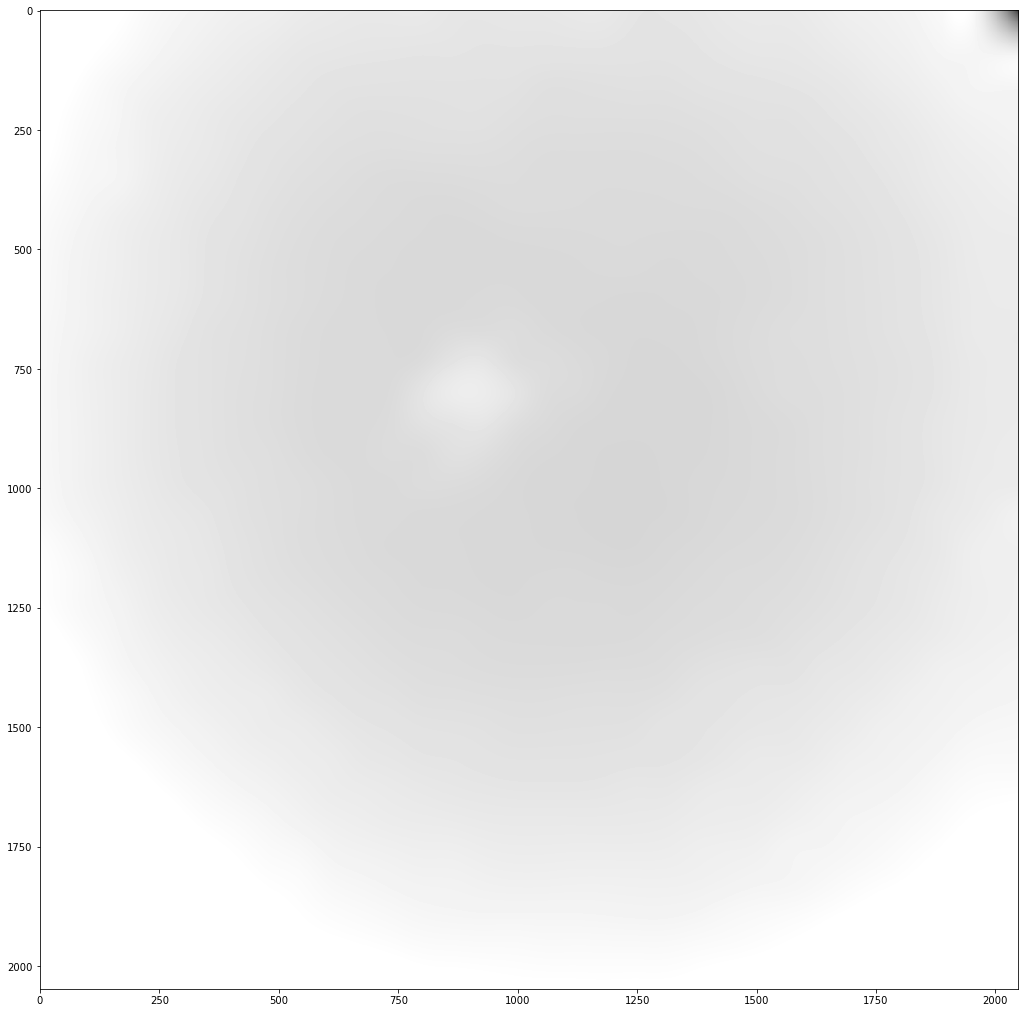

In [151]:
plt.imshow(background, cmap="gray", interpolation='nearest', norm=norm, vmin=vmin, vmax=vmax)